# 1.What is Clustering? Why we use it?

Clustering, in one sentence, is the extraction of natural groupings of similar data objects.

![](https://miro.medium.com/max/720/0*Uw1hHssz9RbqqMXo)

            Republican and Democrat clusters of senators

clustering is a technique used in machine learning to group data points together. The goal of clustering is to find natural groups, or clusters, in the data. Clustering algorithms are used to automatically find these groups. Clustering is useful because it can help to find problems in the data, such as outliers. It can also be used to improve the accuracy of machine learning models by providing more information about the structure of the data. In addition, clustering can be used to compress data, which can speed up training time for machine learning models. overall, clustering is a valuable tool that can be used to understand and improve machine learning models.

---

# **2.Hierarchical clustering**

**Hierarchical clustering is a popular method for grouping objects. It creates groups so that objects within a group are similar to each other and different from objects in other groups. Clusters are visually represented in a hierarchical tree called a dendrogram.**

Hierarchical clustering is an unsupervised learning method for clustering data points. The algorithm builds clusters by measuring the dissimilarities between data. Unsupervised learning means that a model does not have to be trained, and we do not need a "target" variable. This method can be used on any data to visualize and interpret the relationship between individual data points.

## How it works?

A Hierarchical clustering method works via grouping data into a tree of clusters. Hierarchical clustering begins by treating every data point as a separate cluster. Then, it repeatedly executes the subsequent steps:

    Identify the 2 clusters which can be closest together, and
    Merge the 2 maximum comparable clusters. We need to continue these steps until all the clusters are merged together.

In Hierarchical Clustering, the aim is to produce a hierarchical series of nested clusters. A diagram called Dendrogram (A Dendrogram is a tree-like diagram that statistics the sequences of merges or splits) graphically represents this hierarchy and is an inverted tree that describes the order in which factors are merged (bottom-up view) or clusters are broken up (top-down view).

![](https://media.geeksforgeeks.org/wp-content/uploads/20200204181551/Untitled-Diagram71.png)

# **HCA**

![](https://miro.medium.com/max/257/0*iozEcRXXWXbDMrdG.gif)

Hierarchical Clustering (Theory)

    Two Approaches: 1.Agglomerative(Botton-Up) & 2.Divisive(Top-Down)
    Types of Linkages:
        Single Linkage - Nearest Neighbour (Minimal intercluster dissimilarity)
        Complete Linkage - Farthest Neighbour (Maximal intercluster dissimilarity)
        Average Linkage - Average Distance (Mean intercluster dissimilarity)
    Steps in Agglomerative Hierarchical Clustering with Single Linkage
    Determining optimal number of Cluster: Dendogram

08 Dendogram (Theory)

    Hierarchical relationship between objects
    Optimal number of Clusters for Hierarchical Clustering

09 Hierarchical Clustering (Python Code)

    Type of HC
        Agglomerative : Bottom Up approach
        Divisive : Top Down approach
    Number of Clusters defined by Dendogram
    Dendogram : Joining datapoints based on distance & creating clusters
    Linkage : To calculate distance between two points of two clusters
        Single linkage : Minimum Distance between two clusters
        Complete linkage : Maximum Distance between two clusters
        Average linkage : Average Distance between two cluster

### Algorithm:

    Require: X /*data set*/, k /*number of clusters*/

     1: /*initialize*/

     2: χ = {}

     3: for i = 1 : N do

     4:  Ci = {xi}

     5:  χ=χ∪Ci

     6: end for

     7: while |χ| &gt; k do

     8:  (i*,j*)=arg mini,j∈[1…|χ|]:i≠jDIST(Ci,Cj)

     9:  χ=χ−{Ci*,Cj*}∪(Ci*∪Cj*)

    10: end while

    11: return χ

Agglomerative Process

    Choose a distance function for items  d(xi,xj)
    Choose a distance function for clusters D(Ci,Cj) - for clusters formed by just one point, D should reduce to d.
    Start from N clusters, each containing one item.  Then, at each iteration:
        a) using the current matrix of cluster distances, find two closest clusters.
        b) update the list of clusters by merging the two closest.
        c) update the matrix of cluster distances accordingly
    Repeat until all items are joined in one cluster.


![](https://miro.medium.com/max/480/0*BfO2YN_BSxThfUoo.gif)

Start by visualizing some data points:

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
import pandas as pd
sns.set_style('dark')

Now we compute the ward linkage using euclidean distance, and visualize it using a dendrogram

In [11]:
X1 = np.array([[1,1], [3,2], [9,1], [3,7], [7,2], [9,7], [4,8], [8,3],[1,4]])

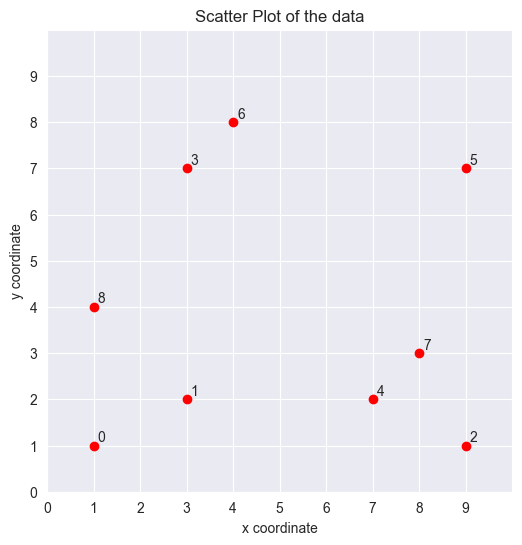

In [12]:
plt.figure(figsize=(6, 6))

plt.scatter(X1[:,0], X1[:,1], c='r')

# Create numbered labels for each point
for i in range(X1.shape[0]):
    plt.annotate(str(i), xy=(X1[i,0], X1[i,1]), xytext=(3, 3), textcoords='offset points')
    
plt.xlabel('x coordinate')
plt.ylabel('y coordinate')
plt.title('Scatter Plot of the data')
plt.xlim([0,10]), plt.ylim([0,10])
plt.xticks(range(10)), plt.yticks(range(10))
plt.grid()

plt.show()


Here, we do the same thing with Python's scikit-learn library. Then, visualize on a 2-dimensional plot:

In [13]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z1 = linkage(X1, method='single', metric='euclidean')
Z2 = linkage(X1, method='complete', metric='euclidean')
Z3 = linkage(X1, method='average', metric='euclidean')
Z4 = linkage(X1, method='ward', metric='euclidean')

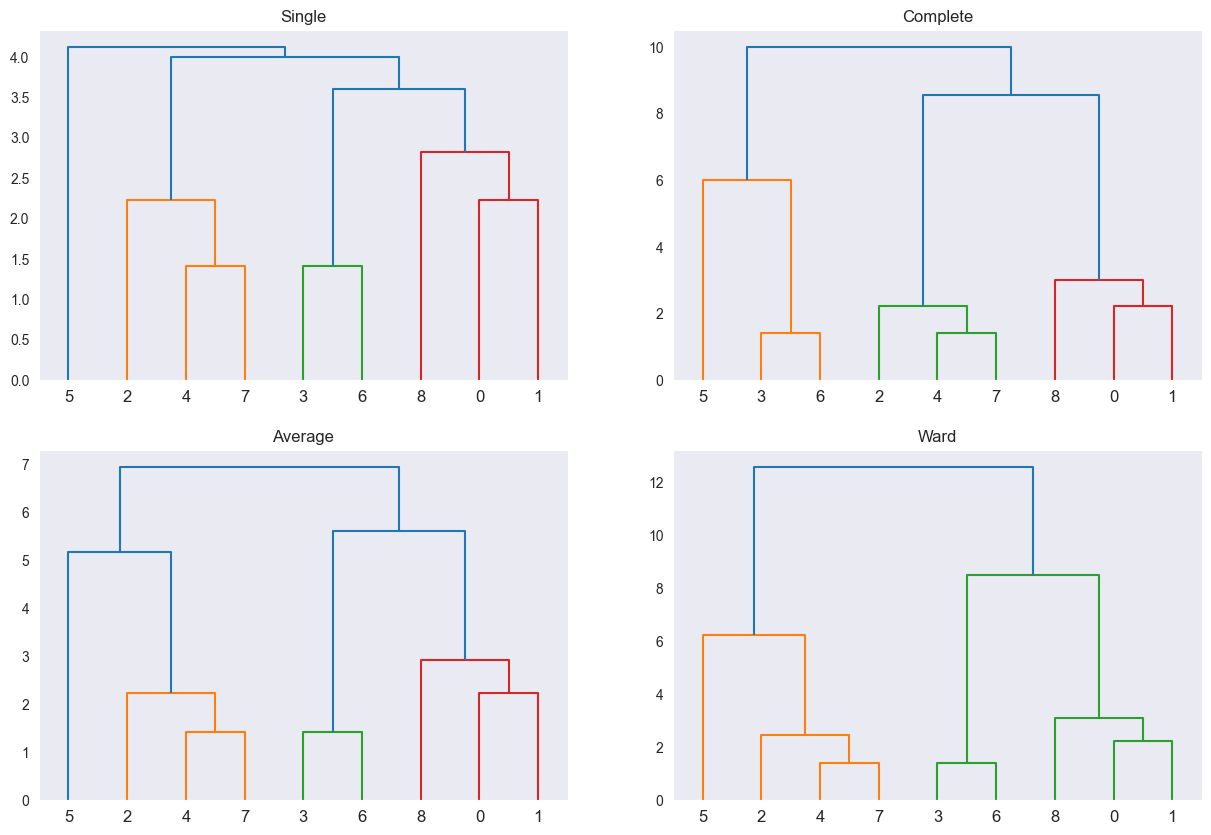

In [14]:
plt.figure(figsize=(15, 10))
plt.subplot(2,2,1), dendrogram(Z1), plt.title('Single')
plt.subplot(2,2,2), dendrogram(Z2), plt.title('Complete')
plt.subplot(2,2,3), dendrogram(Z3), plt.title('Average')
plt.subplot(2,2,4), dendrogram(Z4), plt.title('Ward')
plt.show()

In [15]:
from scipy.cluster.hierarchy import fcluster

f1 = fcluster(Z4, 2, criterion='maxclust')

print(f"Clusters: {f1}")

Clusters: [2 2 1 2 1 1 2 1 2]


In [16]:
from sklearn.cluster import AgglomerativeClustering

Z1 = AgglomerativeClustering(n_clusters=2, linkage='ward')

Z1.fit_predict(X1)

print(Z1.labels_)


[0 0 1 0 1 1 0 1 0]


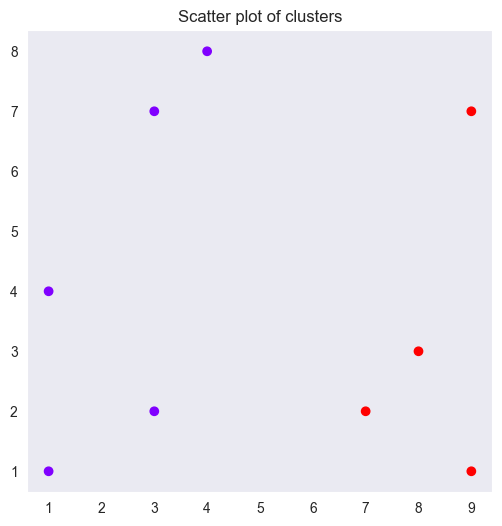

In [17]:
fig, ax = plt.subplots(figsize=(6, 6))

scatter = ax.scatter(X1[:,0], X1[:,1], c=Z1.labels_, cmap='rainbow')

legend = ax.legend(*scatter.legend_elements(), title="Clusters", bbox_to_anchor=(2, 2))
ax.add_artist(legend)

plt.title('Scatter plot of clusters')

plt.show()


In [18]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/LearnDataSci/glossary/main/data/protein.csv')
df.head()

,Country,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr.Veg
0,Albania,10.1,1.4,0.5,8.9,0.2,42.3,0.6,5.5,1.7
1,Austria,8.9,14.0,4.3,19.9,2.1,28.0,3.6,1.3,4.3
2,Belgium,13.5,9.3,4.1,17.5,4.5,26.6,5.7,2.1,4.0
3,Bulgaria,7.8,6.0,1.6,8.3,1.2,56.7,1.1,3.7,4.2
4,Czechoslovakia,9.7,11.4,2.8,12.5,2.0,34.3,5.0,1.1,4.0


In [19]:
X2 = df.iloc[:,1:10]

In [20]:
Z2 = linkage(X2, method='ward', metric='euclidean')

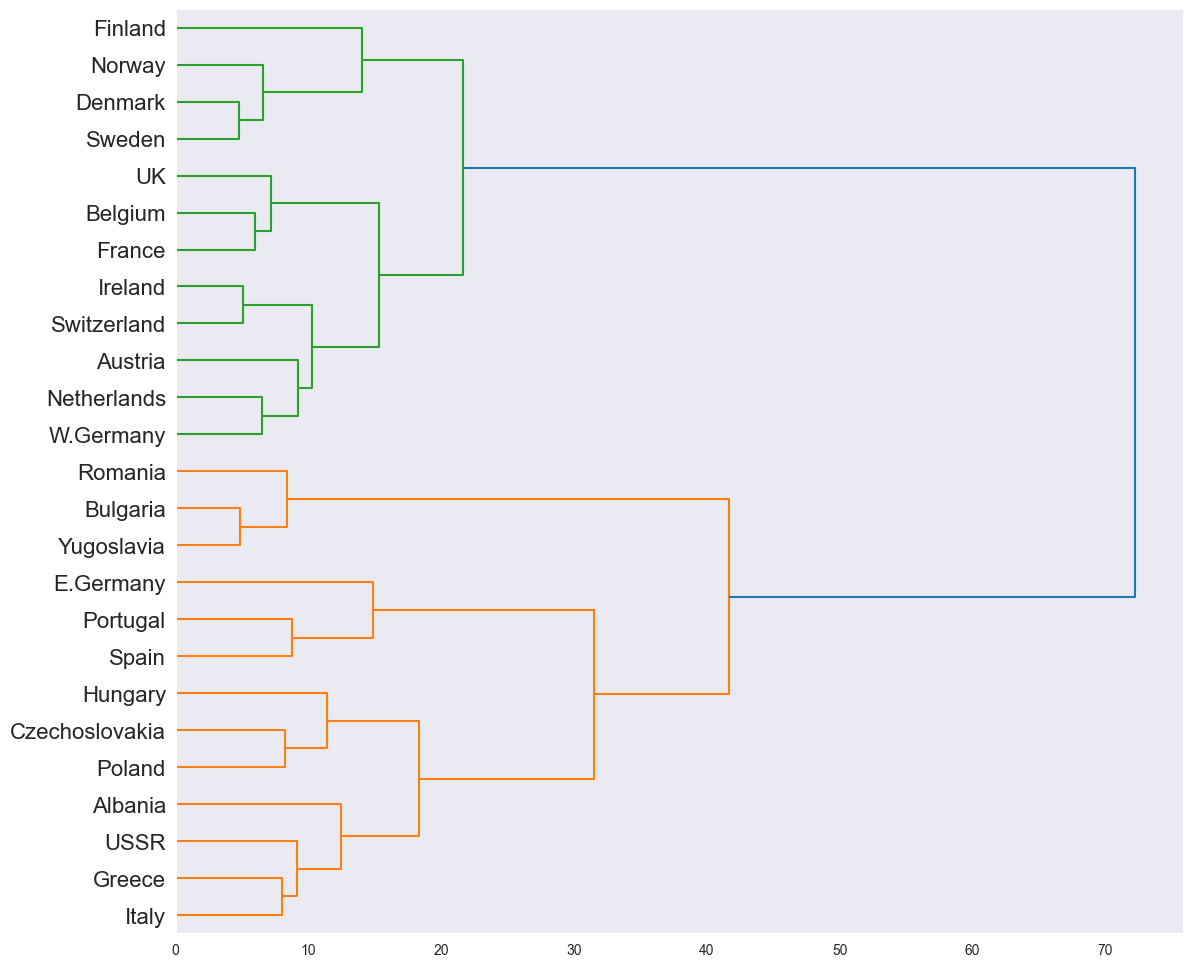

In [21]:
labelList = list(df['Country'])

plt.figure(figsize=(13, 12))
dendrogram(
    Z2,
    orientation='right',
    labels=labelList,
    distance_sort='descending',
    show_leaf_counts=False,
    leaf_font_size=16
)
plt.show()

---

# **3.Bayesian hierarchical clustering**

This algorithm has several advantages over traditional distance-based agglomerative clustering algorithms.


- (1) It defines a probabilistic model of the data which can be used to compute the predictive distribution of a test point and the probability of it belonging to any of the existing clusters in the tree.


-  (2) It uses a model-based criterion to decide on merging clusters rather than an ad-hoc distance metric.


-   (3) Bayesian hypothesis testing is used to decide which merges are advantageous and to output the recommended depth of the tree.


-    (4) The algorithm can be interpreted as a novel fast bottom-up approximate inference method for a Dirichlet process (i.e. countably infinite) mixture model (DPM)

There are several limitations to the traditional hierarchical clustering algorithm. The algorithm provides
no guide to choosing the “correct” number of clusters
or the level at which to prune the tree. It is often difficult to know which distance metric to choose, especially for structured data such as images or sequences.
The traditional algorithm does not define a probabilistic model of the data, so it is hard to ask how “good”
a clustering is, to compare to other models, to make
predictions and cluster new data into an existing hierarchy.

# How it works?

Bayesian hierarchical clustering algorithm uses
marginal likelihoods to decide which clusters to merge
and to avoid overfitting. Basically it asks what the
probability is that all the data in a potential merge
were generated from the same mixture component,
and compares this to exponentially many hypotheses
at lower levels of the tree

### Algorithm:

![](https://github.com/showmidelo/SBU-ML-Winter-23/blob/main/result/Bayesian%20Hierarchical%20Clustering.jpg?raw=true)

![](https://github.com/showmidelo/SBU-ML-Winter-23/blob/main/Bayesian%20Hierarchical%20Clustering.jpg?raw=true)

---

# 4.DATA

**Here we use a dataset which is about animals and by clustering we are able to group them.**

A simple database containing 17 Boolean-valued attributes. The "type" attribute appears to be the class attribute. Here is a breakdown of which animals are in which type

Class# -- Set of animals:

====== ====================================================

1 -- (41) aardvark, antelope, bear, boar, buffalo, calf, cavy, cheetah, deer, dolphin, elephant, fruitbat, giraffe, girl, goat, gorilla, hamster, hare, leopard, lion, lynx, mink, mole, mongoose, opossum, oryx, platypus, polecat, pony, porpoise, puma, pussycat, raccoon, reindeer, seal, sealion, squirrel, vampire, vole, wallaby,wolf

2 -- (20) chicken, crow, dove, duck, flamingo, gull, hawk, kiwi, lark, ostrich, parakeet, penguin, pheasant, rhea, skimmer, skua, sparrow, swan, vulture, wren

3 -- (5) pitviper, seasnake, slowworm, tortoise, tuatara

4 -- (13) bass, carp, catfish, chub, dogfish, haddock, herring, pike, piranha, seahorse, sole, stingray, tuna

5 -- (4) frog, frog, newt, toad

6 -- (8) flea, gnat, honeybee, housefly, ladybird, moth, termite, wasp

7 -- (10) clam, crab, crayfish, lobster, octopus, scorpion, seawasp, slug, starfish, worm

Attribute Information:

1. animal name: Unique for each instance
2. hair: Boolean
3. feathers: Boolean
4. eggs: Boolean
5. milk: Boolean
6. airborne: Boolean
7. aquatic: Boolean
8. predator: Boolean
9. toothed: Boolean
10. backbone: Boolean
11. breathes: Boolean
12. venomous: Boolean
13. fins: Boolean
14. legs: Numeric (set of values: {0,2,4,5,6,8})
15. tail: Boolean
16. domestic: Boolean
17. catsize: Boolean
18. type: Numeric (integer values in range [1,7])

# 5.Dataset shape and info

In [32]:
zoo = pd.read_csv("C:\\Users\\Lion\\Desktop\\zoo.data")
zoo

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [33]:
zoo.shape

(101, 18)

In [34]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [35]:
zoo.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


-----

# **6.Using Hierarchical clustering**

    pros: sums up the data, good for small data sets
    
    cons: computationally demanding, fails on larger sets

Clustering is an unsupervised machine learning method of identifying and grouping similar data points in larger datasets without concern for the specific outcome. Clustering (sometimes called cluster analysis) is usually used to classify data into structures that are more easily understood and manipulated.

In [3]:
zoo = pd.read_csv("C:\\Users\\Lion\\Desktop\\zoo.data")
zoo

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [4]:
X3 = zoo.iloc[:,1:]
X3

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [9]:
Z3 = linkage(X3, method='ward', metric='euclidean')

In [10]:
list(zoo["animal name"])

['aardvark',
 'antelope',
 'bass',
 'bear',
 'boar',
 'buffalo',
 'calf',
 'carp',
 'catfish',
 'cavy',
 'cheetah',
 'chicken',
 'chub',
 'clam',
 'crab',
 'crayfish',
 'crow',
 'deer',
 'dogfish',
 'dolphin',
 'dove',
 'duck',
 'elephant',
 'flamingo',
 'flea',
 'frog',
 'frog',
 'fruitbat',
 'giraffe',
 'girl',
 'gnat',
 'goat',
 'gorilla',
 'gull',
 'haddock',
 'hamster',
 'hare',
 'hawk',
 'herring',
 'honeybee',
 'housefly',
 'kiwi',
 'ladybird',
 'lark',
 'leopard',
 'lion',
 'lobster',
 'lynx',
 'mink',
 'mole',
 'mongoose',
 'moth',
 'newt',
 'octopus',
 'opossum',
 'oryx',
 'ostrich',
 'parakeet',
 'penguin',
 'pheasant',
 'pike',
 'piranha',
 'pitviper',
 'platypus',
 'polecat',
 'pony',
 'porpoise',
 'puma',
 'pussycat',
 'raccoon',
 'reindeer',
 'rhea',
 'scorpion',
 'seahorse',
 'seal',
 'sealion',
 'seasnake',
 'seawasp',
 'skimmer',
 'skua',
 'slowworm',
 'slug',
 'sole',
 'sparrow',
 'squirrel',
 'starfish',
 'stingray',
 'swan',
 'termite',
 'toad',
 'tortoise',
 'tuat

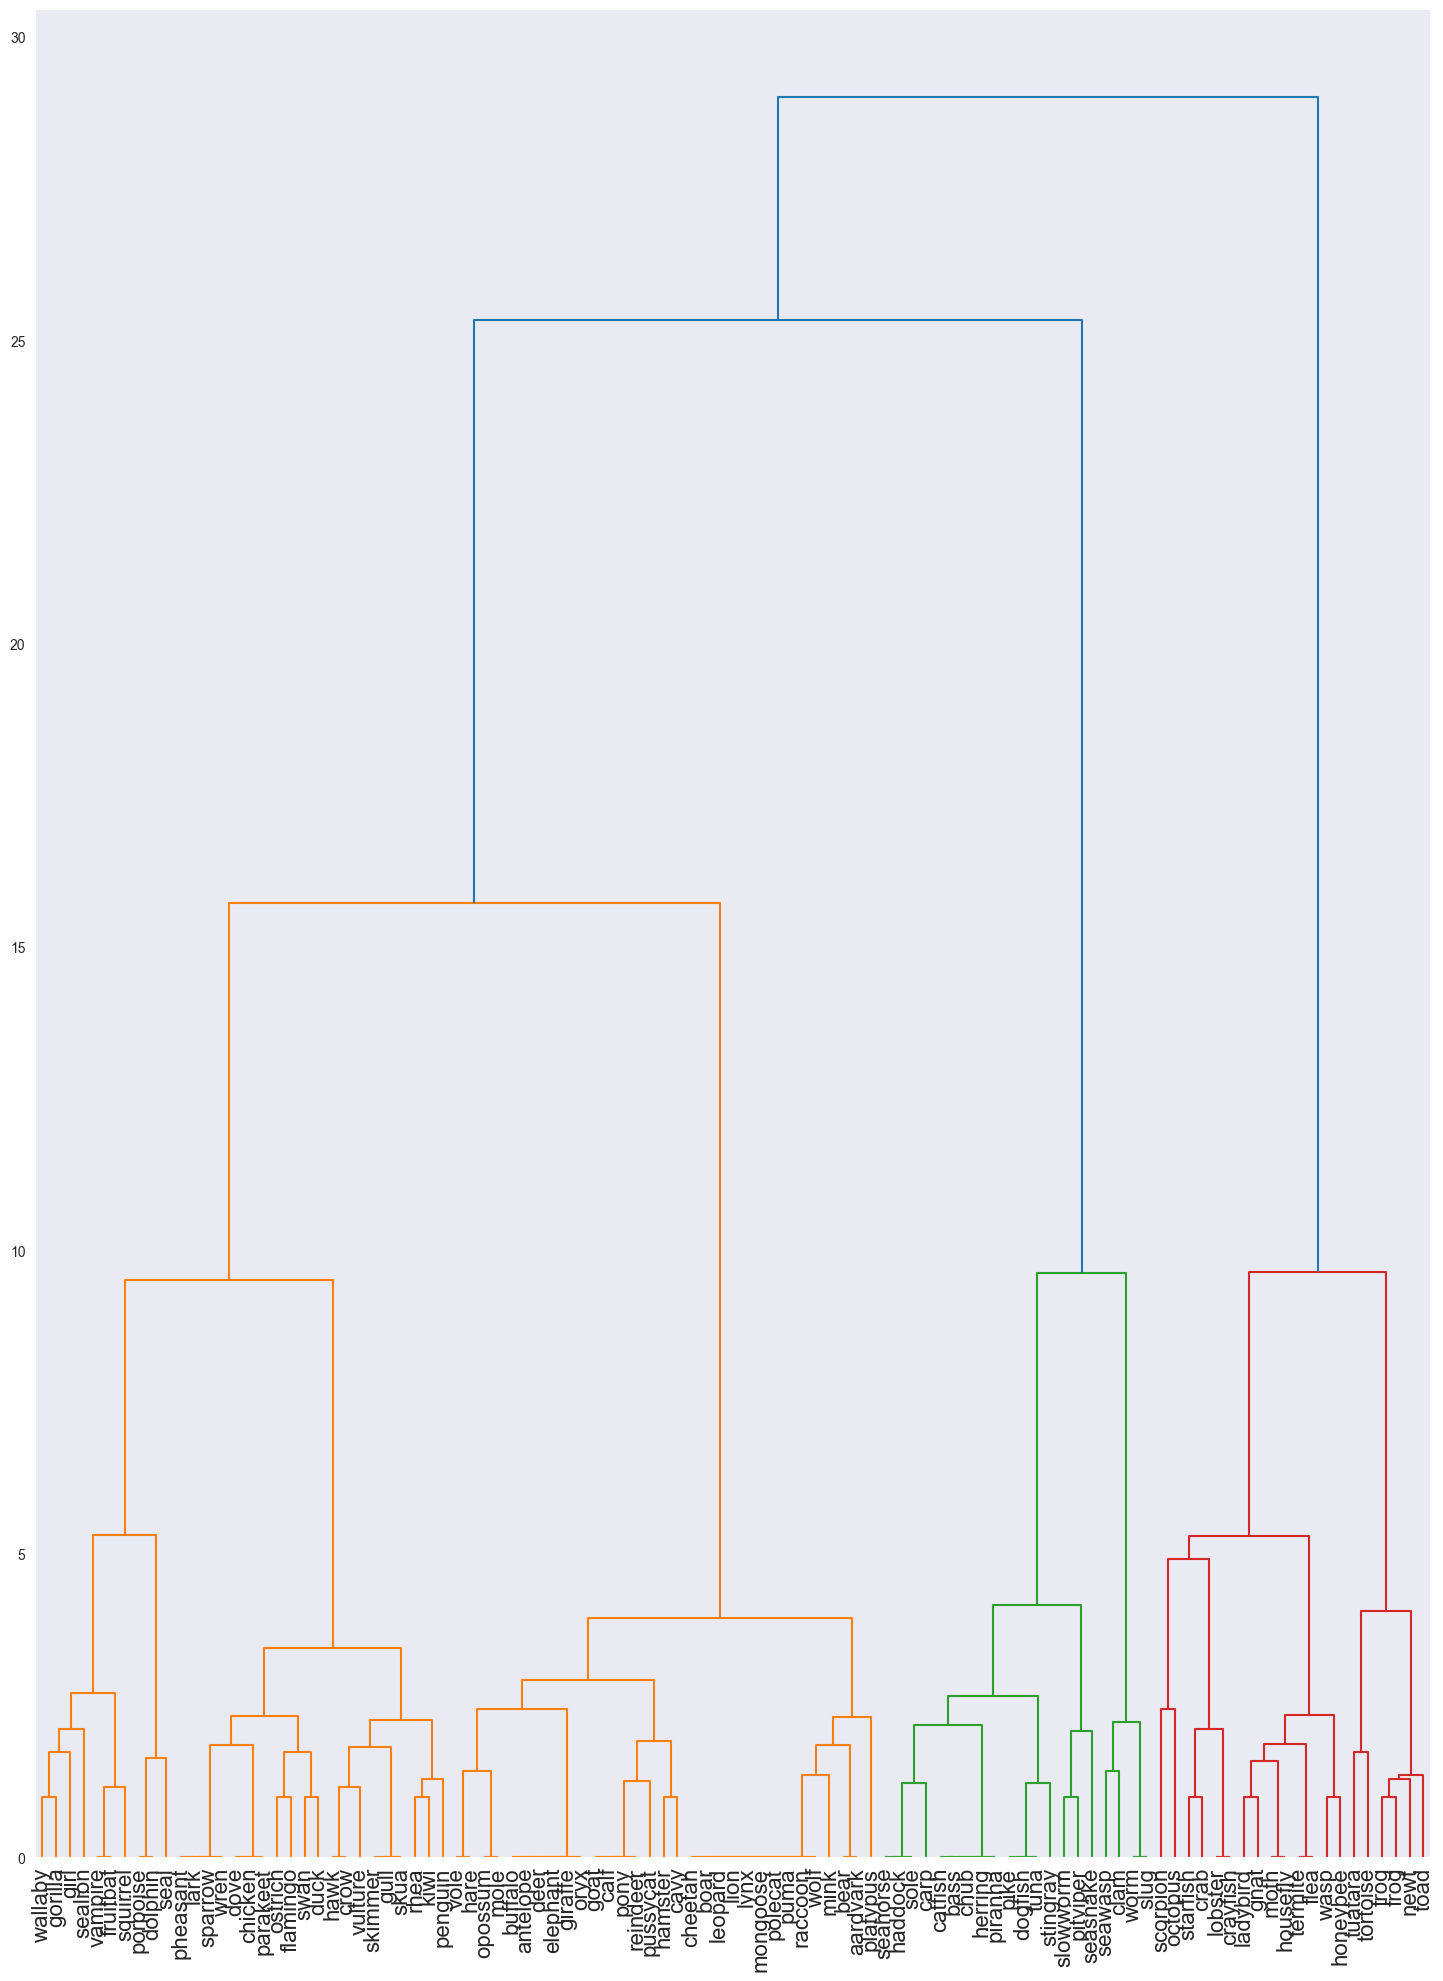

In [ ]:
labelList = list(zoo["animal name"])

plt.figure(figsize=(18, 24))
dendrogram(
    Z3,
    labels=labelList,
    distance_sort='descending',
    show_leaf_counts=False,
    leaf_font_size=16
)
plt.show()

#### **Rotate it to be more readable**

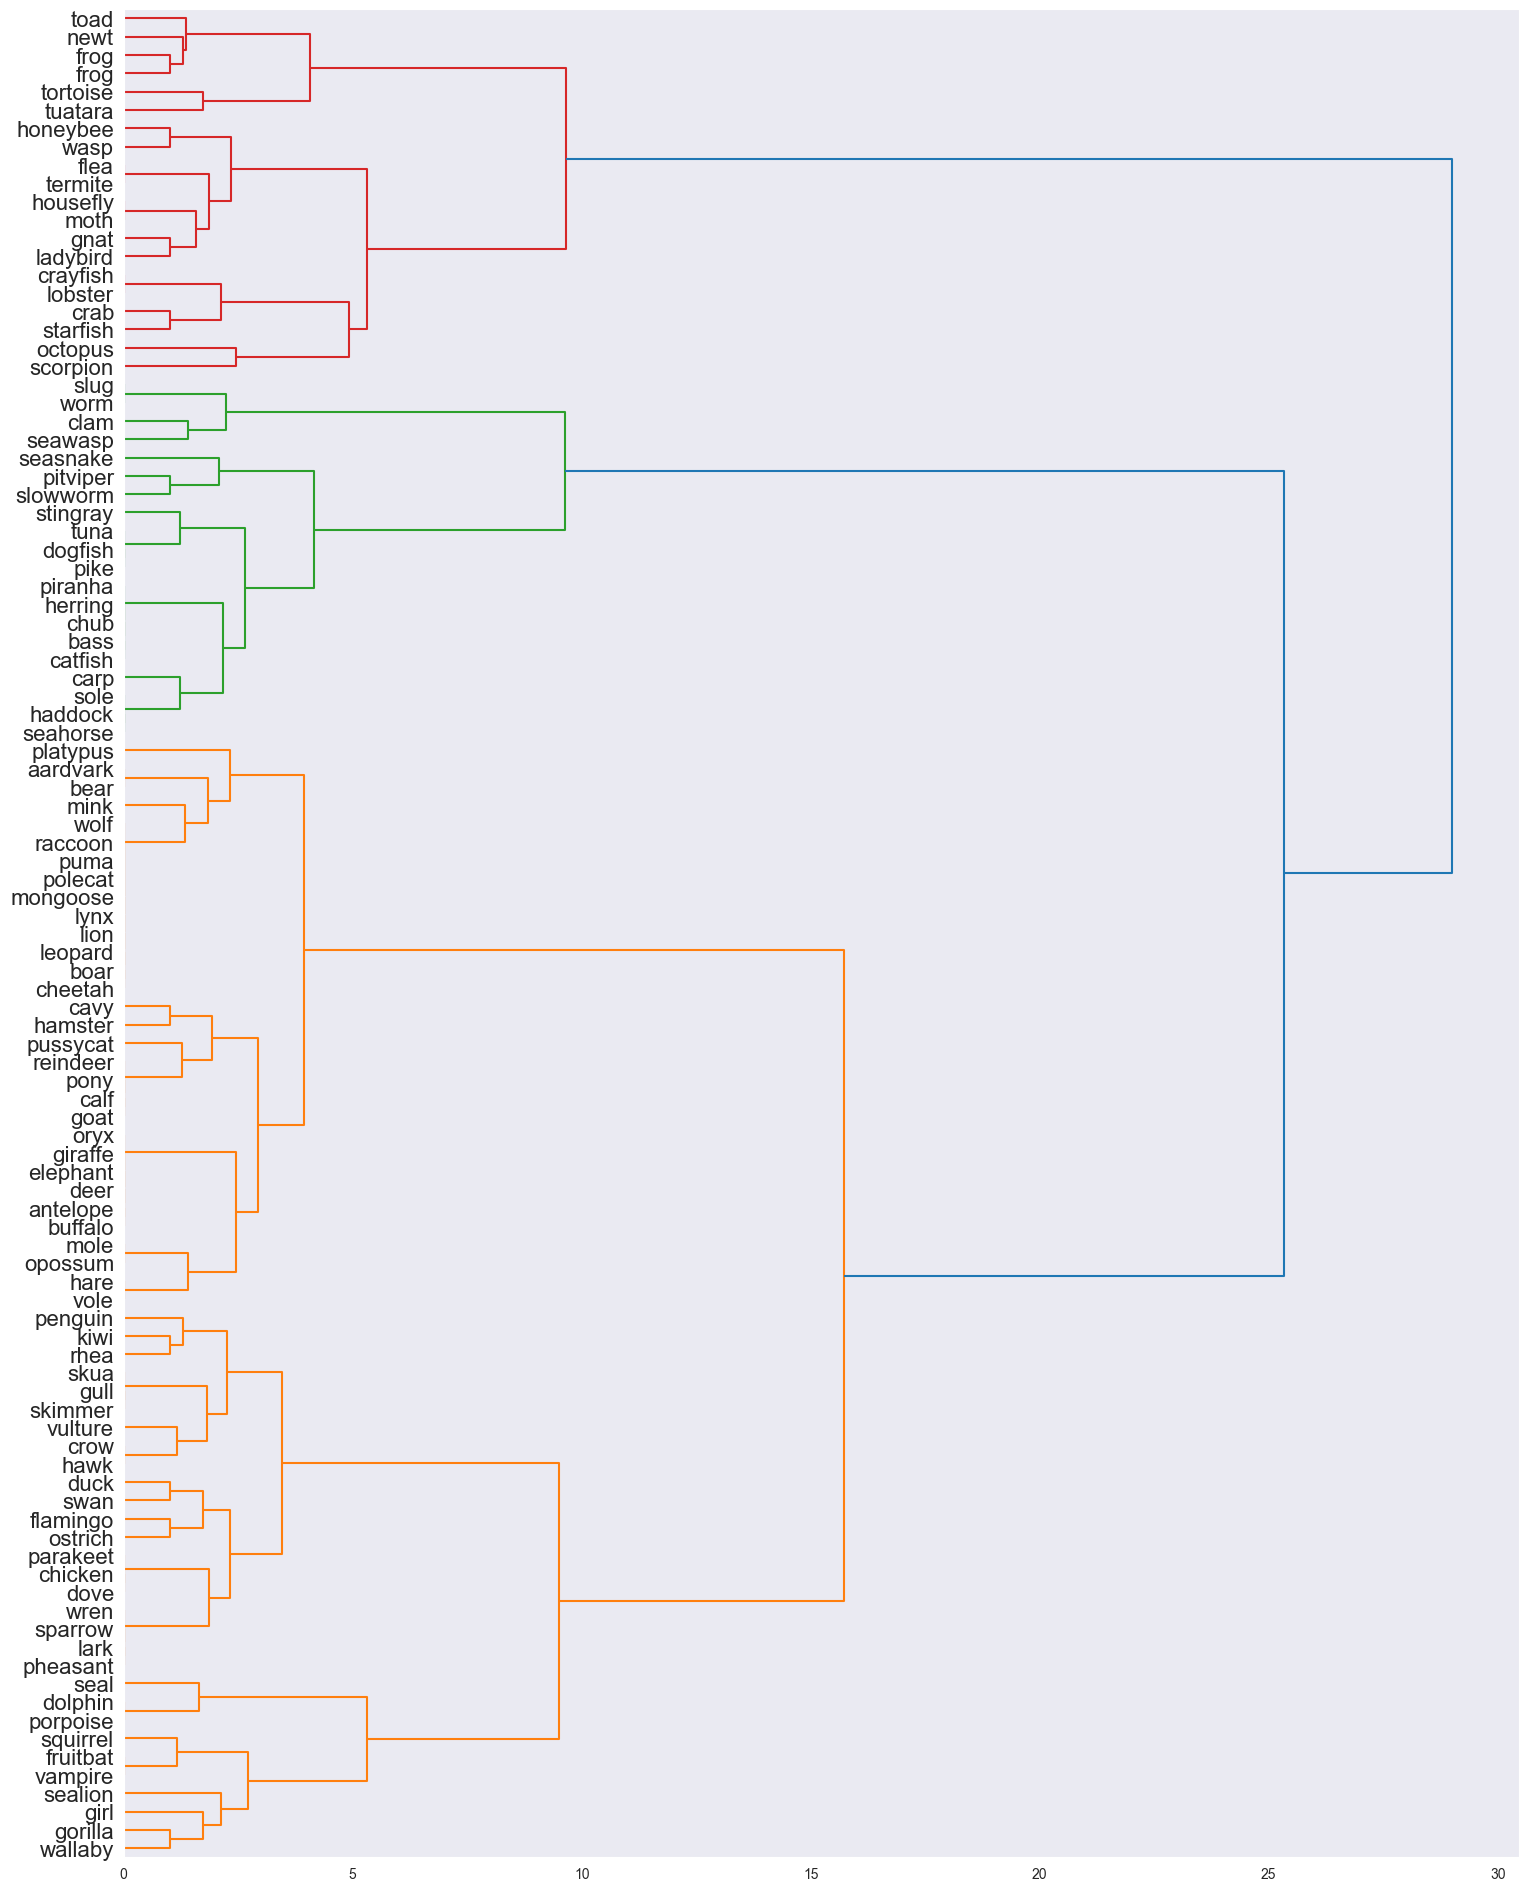

In [11]:
labelList = list(zoo["animal name"])

plt.figure(figsize=(18, 24))
dendrogram(
    Z3,
    orientation='right',
    labels=labelList,
    distance_sort='descending',
    show_leaf_counts=False,
    leaf_font_size=16
)
plt.show()

---

# **7.Using Bayesian hierarchical clustering**

***NOTICE***

**for performing BHC Algorithm I used a library in R language which name is BHC and All the things that have been performed on data are saved  in bhc.ipynb**

### **case 1 plot** 

![](https://github.com/showmidelo/SBU-ML-Winter-23/blob/main/result/case1_bhc.png?raw=true)

### **case 2 plot**

![](https://github.com/showmidelo/SBU-ML-Winter-23/blob/main/result/case2_bhc.png?raw=true)